This file exists to test analysis of the kidney data

In [3]:
import scanpy as sc
from statsmodels.datasets.co2 import TITLE

# Load the kidney data
kidney = sc.read_h5ad("/Volumes/CHAMPANERI/Databases/KidneyData.h5ad")

In [14]:
kidney

AnnData object with n_obs × n_vars = 194504 × 33418
    obs: 'Dataset', 'donor_id', 'suspension_type', 'Original_annotation', 'CellHint_harmonised_group', 'Curated_annotation', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'tissue_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'exist_in_Lake2021', 'exist_in_Muto2021', 'exist_in_Stewart2019', 'exist_in_HCAkidney2022', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title', 'cell_type_colors', 'pca', 'dendrogram_cell_type'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'

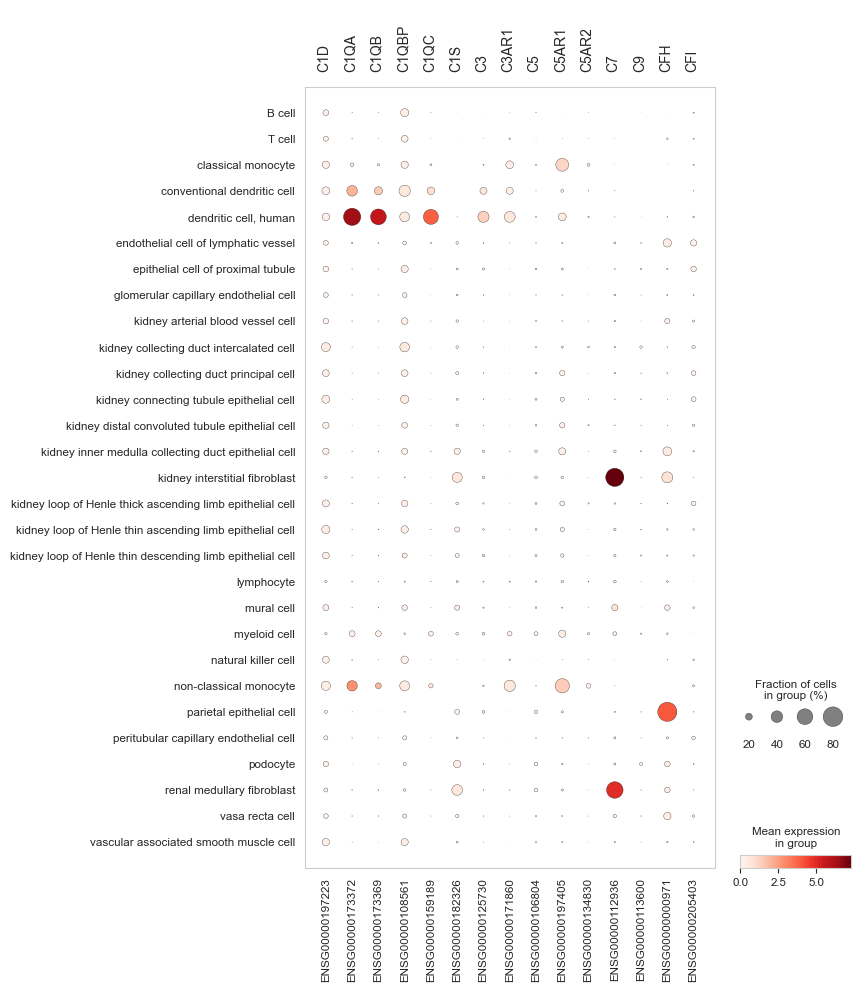

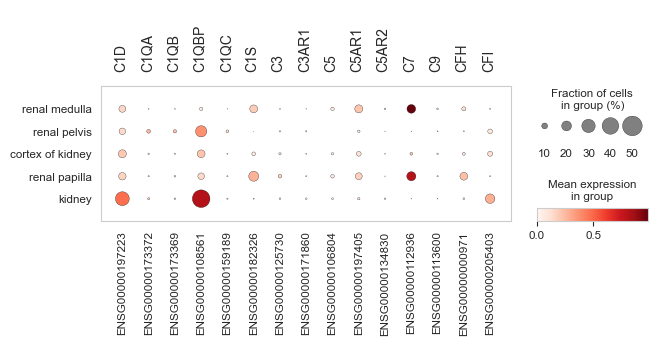

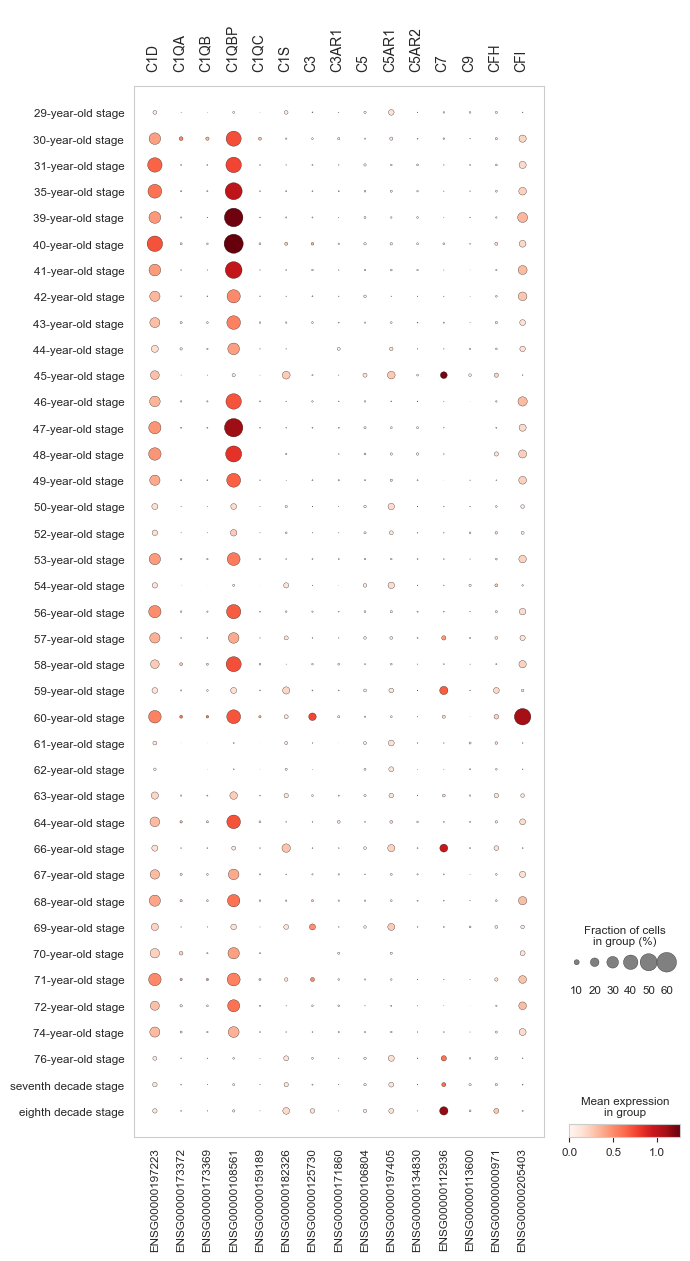

In [6]:
gene_id = {
    "C1D": "ENSG00000197223",
    "C1QA": "ENSG00000173372",
    "C1QB": "ENSG00000173369",
    "C1QBP": "ENSG00000108561",
    "C1QC": "ENSG00000159189",
    "C1S": "ENSG00000182326",
    "C3": "ENSG00000125730",
    "C3AR1": "ENSG00000171860",
    "C5": "ENSG00000106804",
    "C5AR1": "ENSG00000197405",
    "C5AR2": "ENSG00000134830",
    "C7": "ENSG00000112936",
    "C9": "ENSG00000113600",
    "CFH": "ENSG00000000971",
    "CFI": "ENSG00000205403"
}

sc.pl.dotplot(kidney, gene_id, groupby='cell_type')
sc.pl.dotplot(kidney, gene_id, groupby='tissue')
sc.pl.dotplot(kidney, gene_id, groupby='development_stage')

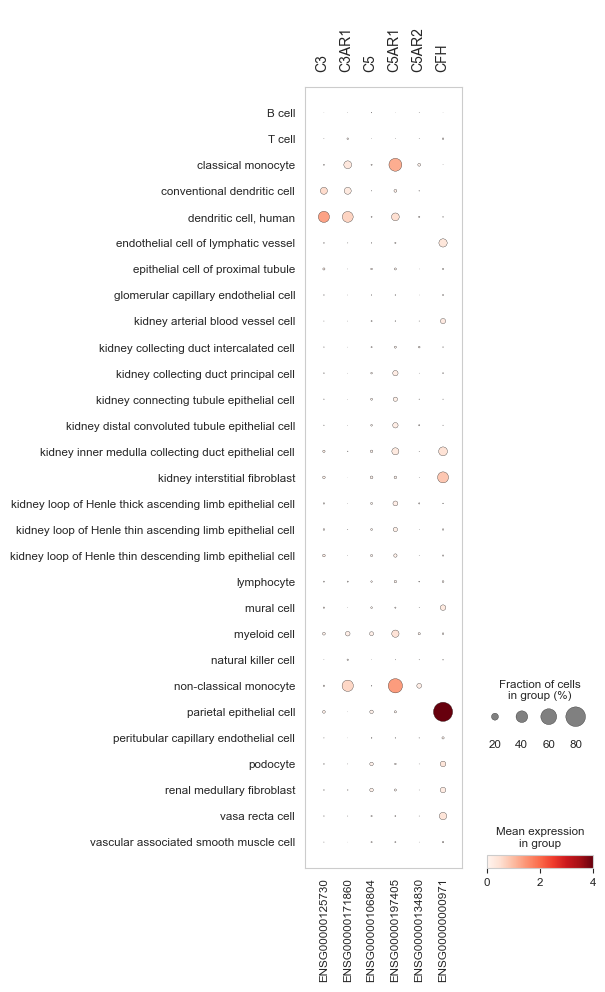

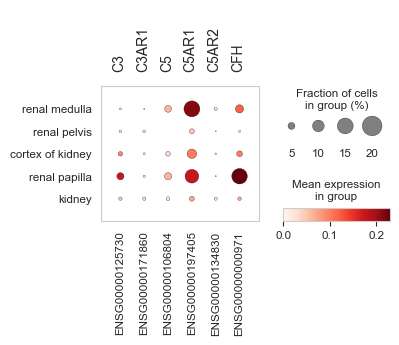

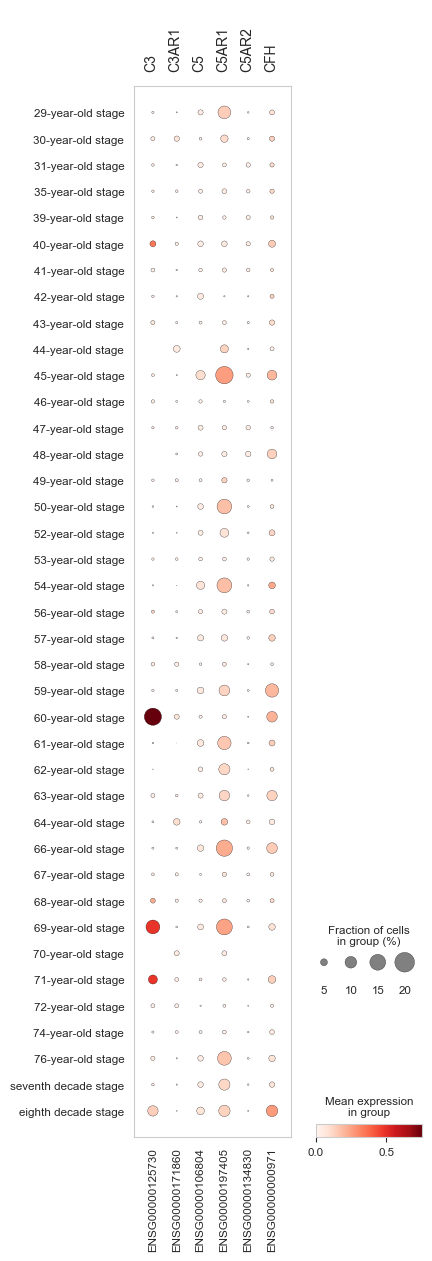

In [7]:
gene_id = {
    "C3": "ENSG00000125730",
    "C3AR1": "ENSG00000171860",
    "C5": "ENSG00000106804",
    "C5AR1": "ENSG00000197405",
    "C5AR2": "ENSG00000134830",
    "CFH": "ENSG00000000971",
}

sc.pl.dotplot(kidney, gene_id, groupby='cell_type')
sc.pl.dotplot(kidney, gene_id, groupby='tissue')
sc.pl.dotplot(kidney, gene_id, groupby='development_stage')

categories: B cell, T cell, classical monocyte, etc.
var_group_labels: C3, C3AR1, C5, etc.


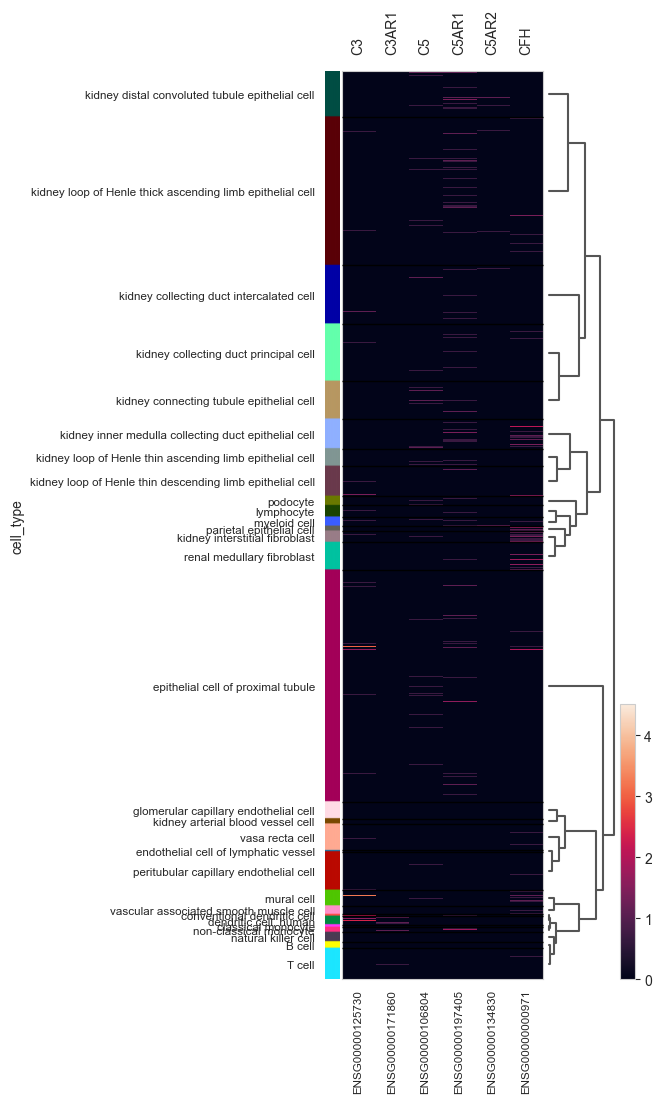

In [12]:
import scanpy as sc
sc.pl.heatmap(kidney, gene_id, groupby='cell_type', swap_axes=False, log=True, figsize=(4,12), dendrogram=True)

categories: B cell, T cell, classical monocyte, etc.
var_group_labels: C3, C3AR1, C5, etc.


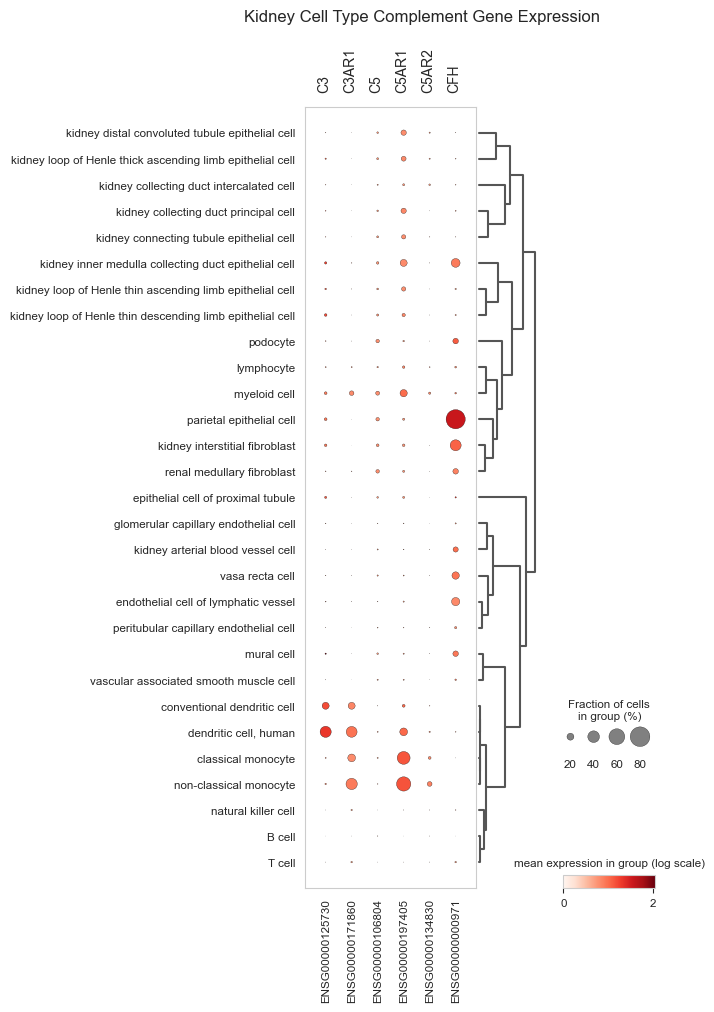

In [32]:
# Plot the dotplots for subset_genes + only cells expressing the gene
sc.tl.dendrogram(kidney, groupby='cell_type')
sc.pl.dotplot(
    kidney,
    gene_id,
    groupby='cell_type',
    log=True,
    colorbar_title='mean expression in group (log scale)',
    mean_only_expressed=True,
    dendrogram=True,
    title='Kidney Cell Type Complement Gene Expression'
)